In [1]:
# Define the query
query = """
SELECT r.run_id, rg.tpm_value, rg.count_value, r.condition
FROM run_genes rg
JOIN runs r ON rg.run_id = r.run_id
WHERE rg.gene_id = ? AND r.study_id = ?
ORDER BY r.run_id DESC;
"""

# Parameters for the query
gene_id = 'Smp_000020'
study_id = 'SRP243831'


In [2]:
import sqlite3
import pandas as pd

db_path = r'C:\Users\Lenovo\Documents\Bioinformatics MSc\2024\Discovery\Basic Database\PreGE\THE_FINAL_ONE.db'

# Connect to SQLite database and execute query
try:
    with sqlite3.connect(db_path) as conn:
        # Execute query and load into DataFrame
        df = pd.read_sql_query(query, conn, params=(gene_id, study_id))
    
    # Print or manipulate the DataFrame
    print(df)

except sqlite3.Error as e:
    print(f"An error occurred: {e}")

        run_id  tpm_value  count_value   condition
0  SRR10947824    43.9838       2167.0     no drug
1  SRR10947823    34.8875       1816.0  PZQ 15 min
2  SRR10947822    42.3480       1800.0      PZQ 1h
3  SRR10947821    39.7418       1707.0      PZQ 3h
4  SRR10947820    43.7870       1738.0      PZQ 6h
5  SRR10947819    34.7839       1443.0      PZQ 9h
6  SRR10947818    48.7807       2010.0     PZQ 12h
7  SRR10947817    47.9218       2111.0     PZQ 24h
8  SRR10947816    36.9859       1636.0     PZQ 48h
9  SRR10947815    41.1319       1544.0     PZQ 96h


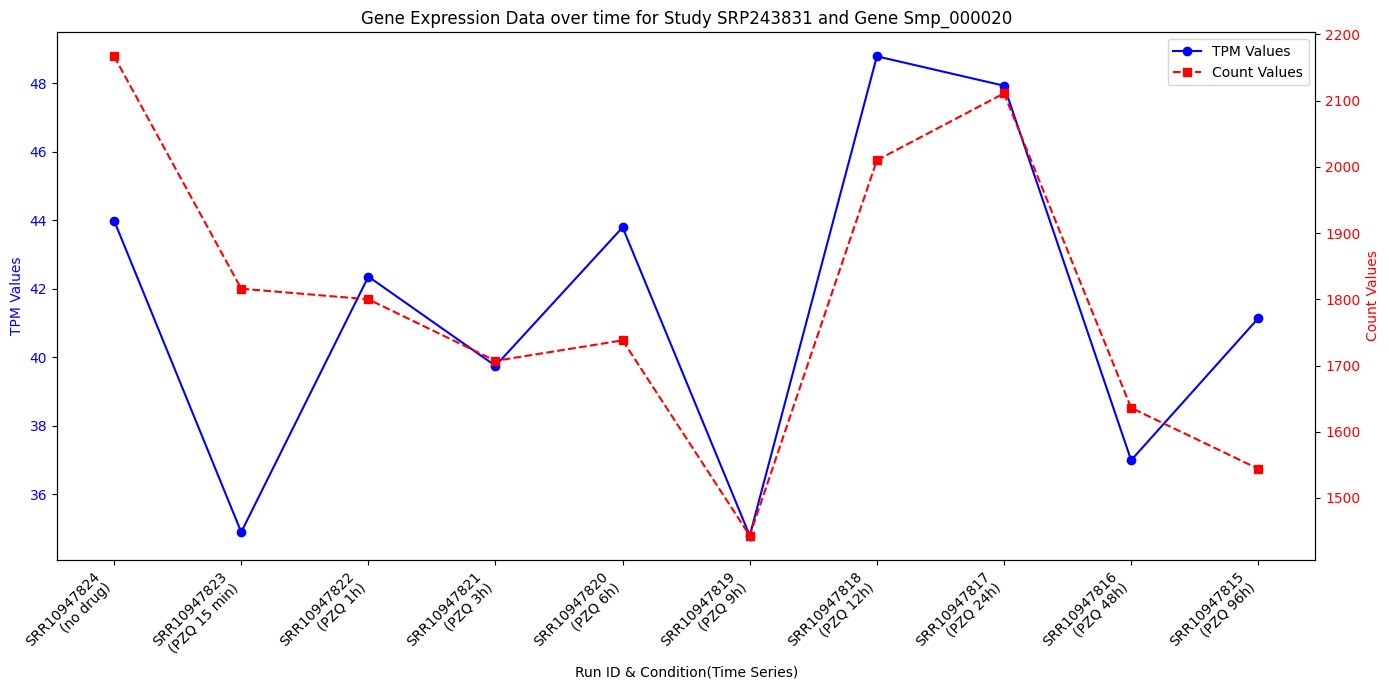

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract data for plotting
run_ids = df['run_id']
tpm_values = df['tpm_value']
count_values = df['count_value']
conditions = df['condition']

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot TPM values on the primary y-axis
ax1.plot(run_ids, tpm_values, marker='o', linestyle='-', color='blue', label='TPM Values')
ax1.set_xlabel('Run ID & Condition(Time Series)')
ax1.set_ylabel('TPM Values', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(run_ids, count_values, marker='s', linestyle='--', color='red', label='Count Values')
ax2.set_ylabel('Count Values', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('Gene Expression Data over time for Study SRP243831 and Gene Smp_000020')

# Combine run IDs and conditions for x-axis labels
combined_labels = [f"{run_id}\n({cond})" for run_id, cond in zip(run_ids, conditions)]
ax1.set_xticks(run_ids)
ax1.set_xticklabels(combined_labels, rotation=45, ha='right')

# Add legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()